In [1]:
include("core.jl")
using Plots


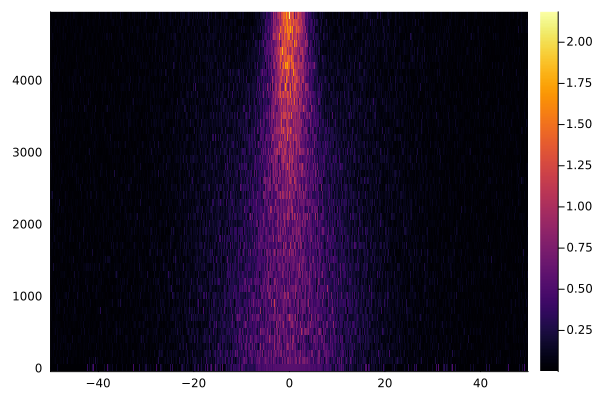

In [121]:
T = 100e-12
N = 2^13
ν = 1/T
t = T*(-N÷2:N÷2-1)/N
L = 5e3
λ = 1.55e-6
fib = Material(L, 0.046e-3, [0.0, -2.1682619391414893e-26], 1.1e-3, λ)
τ = 20e-12
n = 1
P = 0.55
#P = abs((fib.β[2] / fib.γ / τ^2) * n.^2) # Soliton power
#u0  = sqrt(P) * sech.((t.-T/10) ./ τ) .+ cis.(0).*sqrt(P) .* sech.((t.+T/10) ./ τ) .|> ComplexF64 # Soliton formula
u0 = sqrt(P) .* exp.(-(t.*(1.0/τ).^2) 


prob = NLSEProblem(t, u0, fib)

z, A = solve(prob, 10.0, dzg=100.0)

heatmap(t*1e12, z, abs2.(A'))



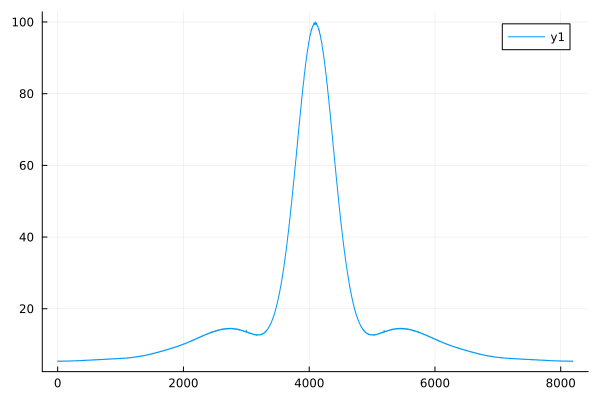

In [143]:
plot(abs2.(A[:,end]))
plot!(abs2.(A[:,1]))
norm(x) = x./maximum(x)
plot(100*norm(real.(fftshift(ifft(abs2.(fft(abs2.(A[:,end].*(1.0)))))[2:end]))))